## Page View Time Series Visualizer


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plot
import seaborn as sns
sns.set()

In [20]:
data = pd.read_csv('fcc-forum-pageviews.csv')
df = data.copy()
df.head()
# df.shape

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [18]:
top = int((0.025*df.shape[0]).__round__(0))
top

33

In [19]:
df = df.iloc[top:df.shape[0]-top,:]
df.shape

(1238, 2)

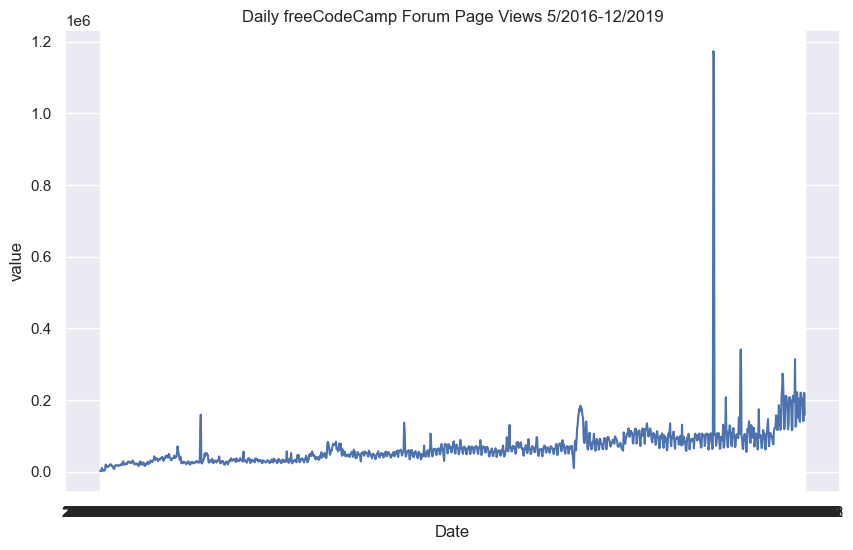

In [21]:
plt.figure(figsize=(10,6))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('value')
sns.lineplot(data = df, x='date',y = 'value')
plt.show()

In [27]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create a figure
p = figure(title=' Page Views 5/2016-12/2019', 
           x_axis_label='Date', y_axis_label='Value', 
           x_axis_type='datetime', height=300, width=700)

# Create the line plot
line = p.line(x='date', y='value', source=source, line_color="blue", line_width=2)

# Show the plot inline in the notebook
show(p)
output_notebook()

Loading BokehJS ...

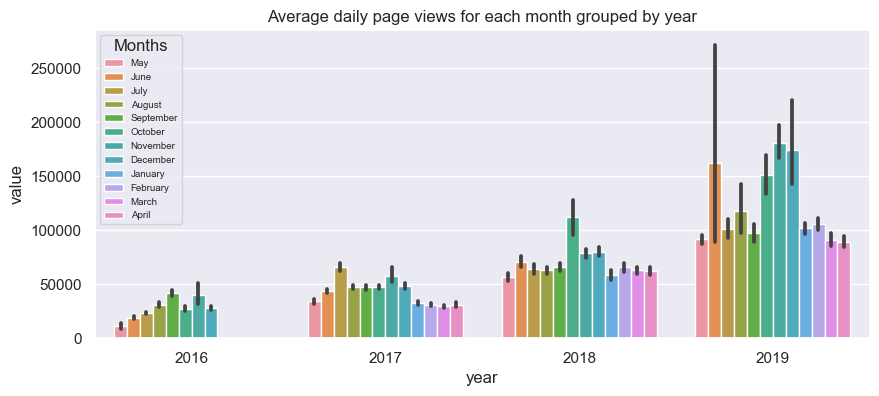

<Figure size 640x480 with 0 Axes>

In [55]:
from datetime import datetime

df['month'] = df['date'].dt.strftime('%B')
df['year'] = df['date'].dt.year

# Create a bar plot
def draw_bar_plot():
    plt.figure(figsize=(10,4))
    plt.title('Average daily page views for each month grouped by year')
    sns.barplot(x='year',y='value',data=df,hue='month')
    plt.legend(title='Months',fontsize = '7')
    plt.show()
    plt.savefig('bar_plot.png')
    plt.show()

draw_bar_plot()

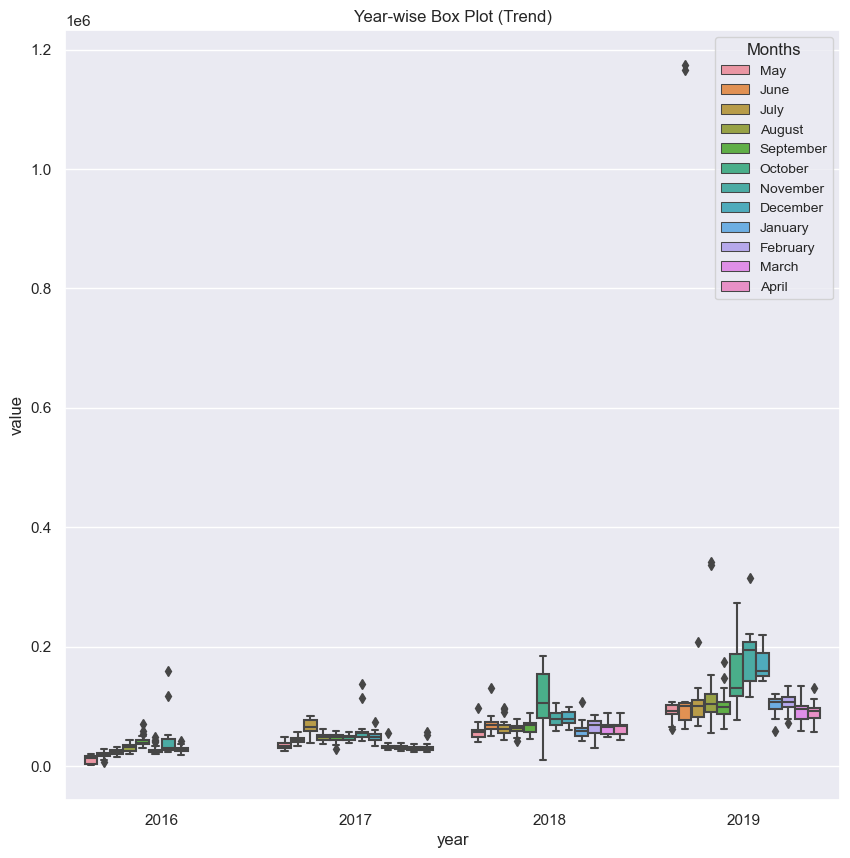

In [57]:
def draw_cat_plot():
    plt.figure(figsize=(10,10))
    plt.title('Year-wise Box Plot (Trend)')
    sns.boxplot(x='year',y='value',data=df,hue='month')
    plt.legend(title='Months',fontsize = '10')
    plt.savefig('box_plot.png')
    plt.show()

draw_cat_plot()